In [340]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error
import statsmodels.api as sms
import pylab as py
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor,RandomForestRegressor,ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor,StackingRegressor,VotingRegressor
from xgboost import XGBRegressor,plot_importance
import pickle

In [2]:
data = pd.read_csv("C:\Lachin\DataSets\Insurance\insurance.csv")

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
print(data.size,data.shape)

9366 (1338, 7)


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
data['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [7]:
data['children'] = data['children'].apply(str)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   object 
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 73.3+ KB


In [9]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [10]:
data['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [11]:
data.describe()#No missing values

,age,bmi,charges
count,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,13270.422265
std,14.049960,6.098187,12110.011237
min,18.000000,15.960000,1121.873900
25%,27.000000,26.296250,4740.287150
50%,39.000000,30.400000,9382.033000
75%,51.000000,34.693750,16639.912515
max,64.000000,53.130000,63770.428010


In [12]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Data Analysis

C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\acer\anaconda3\lib\site-packages\seaborn\distribut

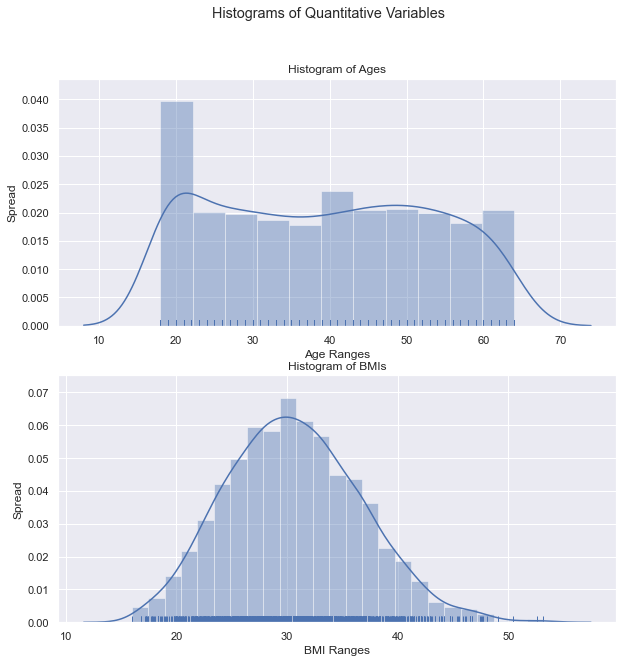

In [13]:
sns.set_theme()
fig, axes = plt.subplots(2,1,figsize=(10,10))
fig.suptitle('Histograms of Quantitative Variables')
sns.distplot(data['age'], kde=True, rug=True,ax=axes[0])
axes[0].set_xlabel('Age Ranges')
axes[0].set_ylabel('Spread')
axes[0].set_title('Histogram of Ages')

sns.distplot(data['bmi'], kde=True, rug=True, ax=axes[1])
axes[1].set_xlabel('BMI Ranges')
axes[1].set_ylabel('Spread')
axes[1].set_title('Histogram of BMIs')
plt.show()

In [14]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\acer\anaconda3\lib\site-p

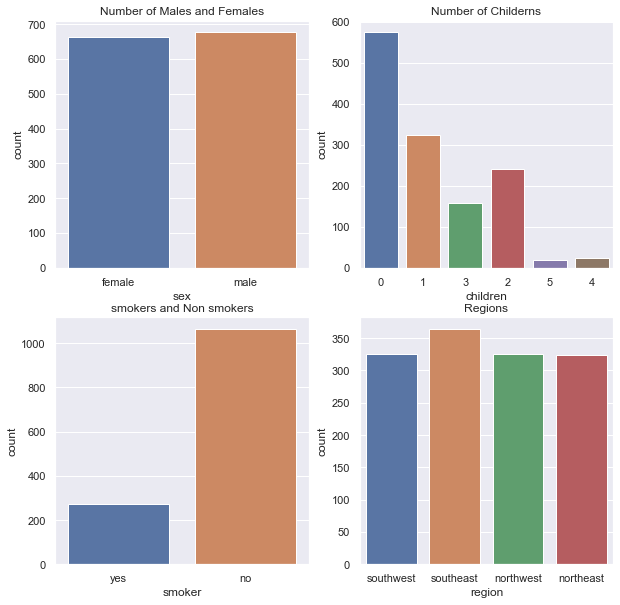

In [15]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.countplot(data['sex'])
plt.title('Number of Males and Females')

plt.subplot(2,2,2)
sns.countplot(data['children'])
plt.title('Number of Childerns')

plt.subplot(2,2,3)
sns.countplot(data['smoker'])
plt.title('smokers and Non smokers')

plt.subplot(2,2,4)
sns.countplot(data['region'])
plt.title('Regions')
plt.show()

In [16]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

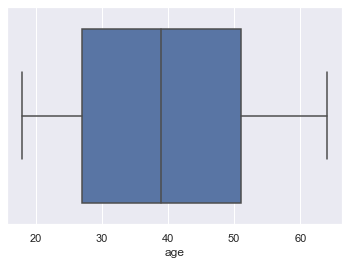

In [17]:
sns.boxplot(data['age'])#no outliers

C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi'>

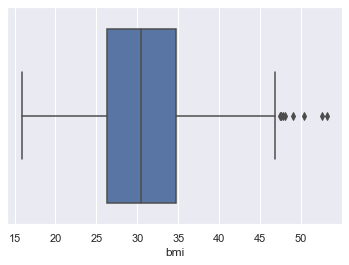

In [18]:
sns.boxplot(data['bmi'])#outliers exist

In [19]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


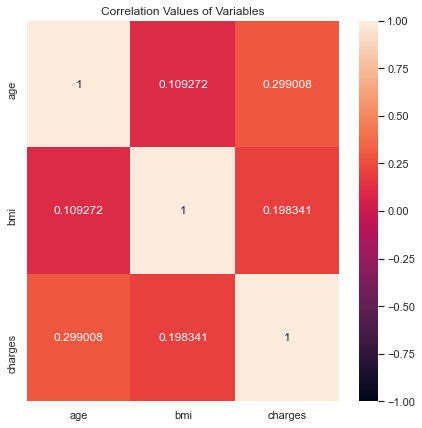

In [20]:
plt.figure(figsize=(7,7))
sns.heatmap(data.corr(), annot=True, fmt='g', vmin=-1, vmax=1)
plt.title('Correlation Values of Variables')
plt.show()

In [21]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<Figure size 360x360 with 0 Axes>

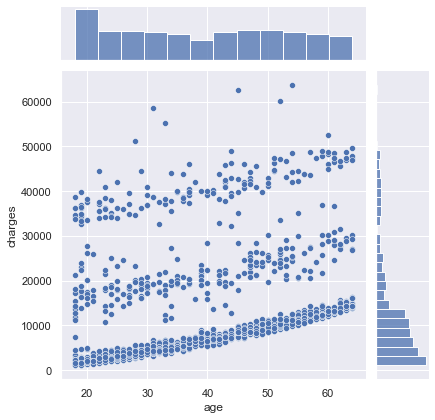

In [22]:
plt.figure(figsize=(5,5))
sns.jointplot(data=data, x='age', y='charges')
plt.show()

<Figure size 360x360 with 0 Axes>

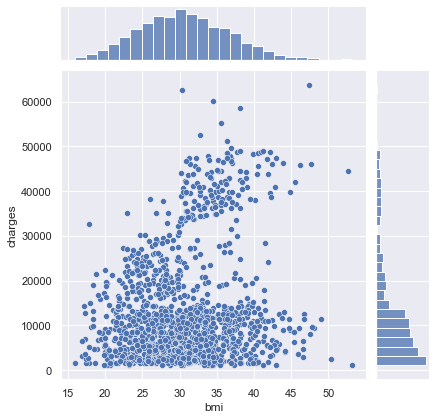

In [23]:
plt.figure(figsize=(5,5))
sns.jointplot(data=data, x='bmi', y='charges')
plt.show()

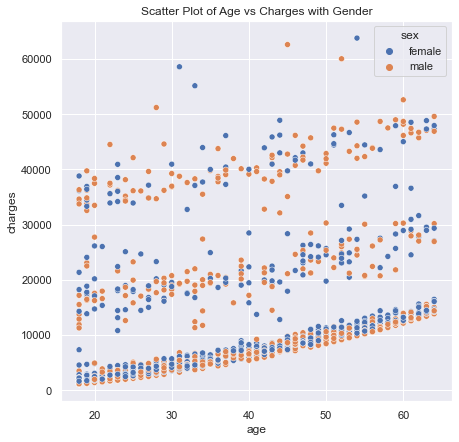

In [24]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=data, x='age', y='charges', hue='sex')
plt.title('Scatter Plot of Age vs Charges with Gender')
plt.show()

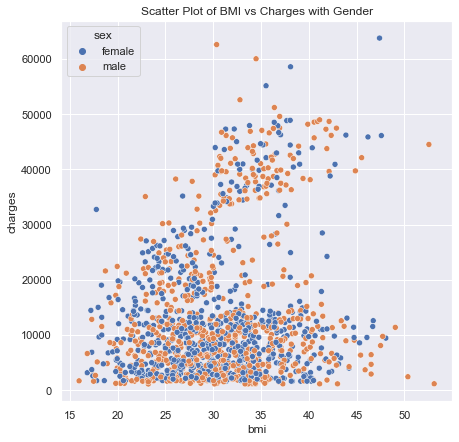

In [25]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=data, x='bmi', y='charges', hue='sex')
plt.title('Scatter Plot of BMI vs Charges with Gender')
plt.show()

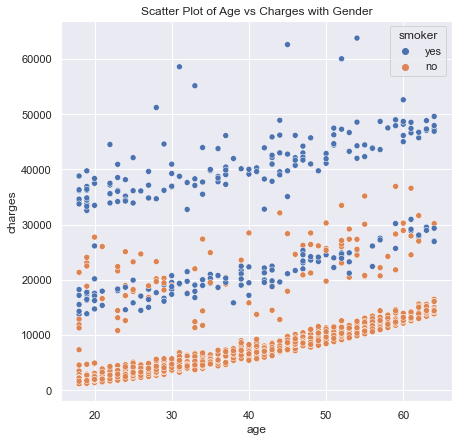

In [26]:
plt.figure(figsize=(7,7))#most of the non smokers have lower hospital charges
sns.scatterplot(data=data, x='age', y='charges', hue='smoker')
plt.title('Scatter Plot of Age vs Charges with Gender')
plt.show()

C:\Users\acer\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 61.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Figure size 504x504 with 0 Axes>

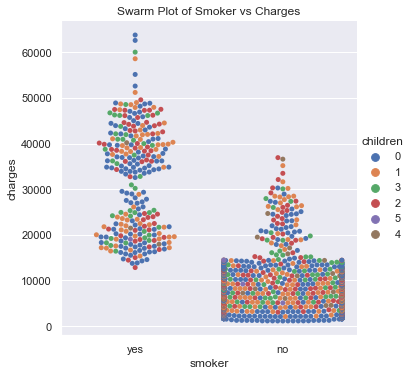

In [27]:
plt.figure(figsize=(7,7))
sns.catplot(data=data, x='smoker', y='charges', kind='swarm', hue='children')
plt.title('Swarm Plot of Smoker vs Charges')
plt.show()

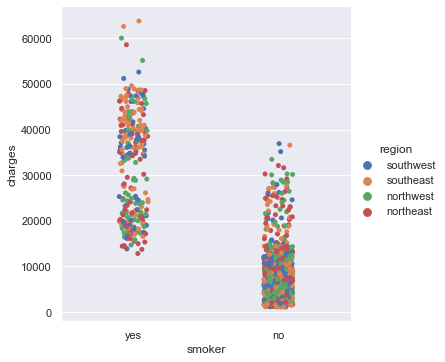

In [28]:
sns.catplot(data=data, x='smoker', y='charges',hue='region')

<Figure size 504x504 with 0 Axes>

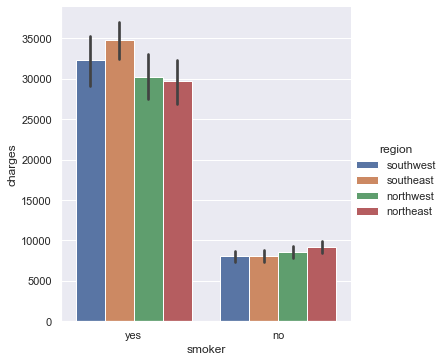

In [29]:
plt.figure(figsize=(7,7))
sns.catplot(data=data, x='smoker', y='charges', kind='bar', hue='region')

<Figure size 504x504 with 0 Axes>

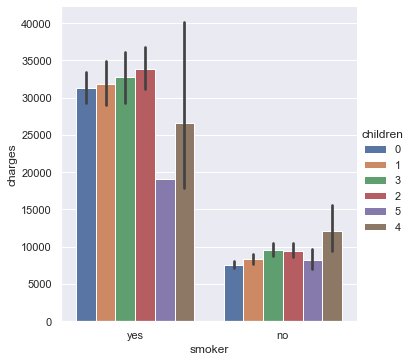

In [30]:
plt.figure(figsize=(7,7))
sns.catplot(data=data, x='smoker', y='charges', kind='bar', hue='children')

In [31]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='smoker', ylabel='count'>

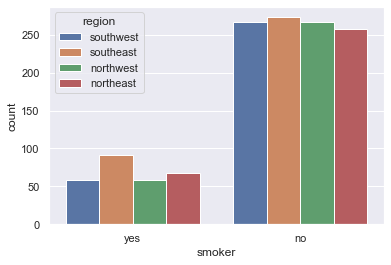

In [32]:
sns.countplot(data['smoker'], hue=data['region'])

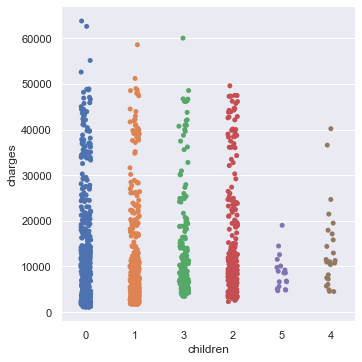

In [33]:
sns.catplot(data=data, x='children', y='charges')

### Data Preprocessing

In [34]:
data.describe()

,age,bmi,charges
count,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,13270.422265
std,14.049960,6.098187,12110.011237
min,18.000000,15.960000,1121.873900
25%,27.000000,26.296250,4740.287150
50%,39.000000,30.400000,9382.033000
75%,51.000000,34.693750,16639.912515
max,64.000000,53.130000,63770.428010


C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi'>

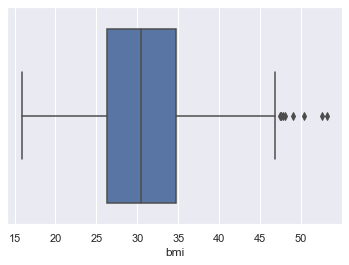

In [35]:
#checking for outliers
sns.boxplot(data['bmi'])

In [36]:
#Removing Outliers
Q1 = data['bmi'].quantile(0.25)
Q3 = data['bmi'].quantile(0.75)
IQR = Q3 - Q1
print(f'IQR of the Column is: {IQR} ')

IQR of the Column is: 8.3975 


In [37]:
outrows = ((data['bmi'] < Q1 - 1.5*IQR) | (data['bmi']>Q3 + 1.5*IQR))

In [38]:
outrows.value_counts()

False    1329
True        9
Name: bmi, dtype: int64

In [39]:
data1 = data[~outrows]

In [40]:
print('Before removing the outliers, data shape is: {}'.format(data.shape))
print('After removing the outliers, data shape is: {}'.format(data1.shape))

Before removing the outliers, data shape is: (1338, 7)
After removing the outliers, data shape is: (1329, 7)


C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi'>

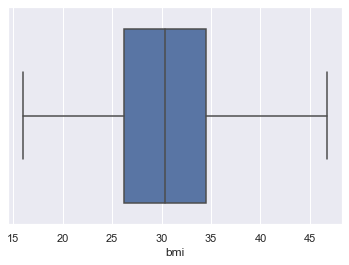

In [41]:
sns.boxplot(data1['bmi'])

In [42]:
data1.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [43]:
#checking for missing values and dupliccates
data1.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [44]:
data1.duplicated().sum()

1

In [45]:
data1.drop_duplicates(inplace=True)

<ipython-input-45-40d23f0d977c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1.drop_duplicates(inplace=True)


In [46]:
data1.shape

(1328, 7)

In [47]:
data1.duplicated().sum()

0

In [48]:
#Since any variable transformation is not necessary, can directly move in to machine Learning

In [49]:
data1.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [50]:
#Dummy variable creation
df = pd.get_dummies(data1, columns=['sex','children','smoker','region'], drop_first=True)

In [51]:
df.head()

,age,bmi,charges,sex_male,children_1,children_2,children_3,children_4,children_5,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,16884.92400,0,0,0,0,0,0,1,0,0,1
1,18,33.770,1725.55230,1,1,0,0,0,0,0,0,1,0
2,28,33.000,4449.46200,1,0,0,1,0,0,0,0,1,0
3,33,22.705,21984.47061,1,0,0,0,0,0,0,1,0,0
4,32,28.880,3866.85520,1,0,0,0,0,0,0,1,0,0


In [52]:
df.shape

(1328, 13)

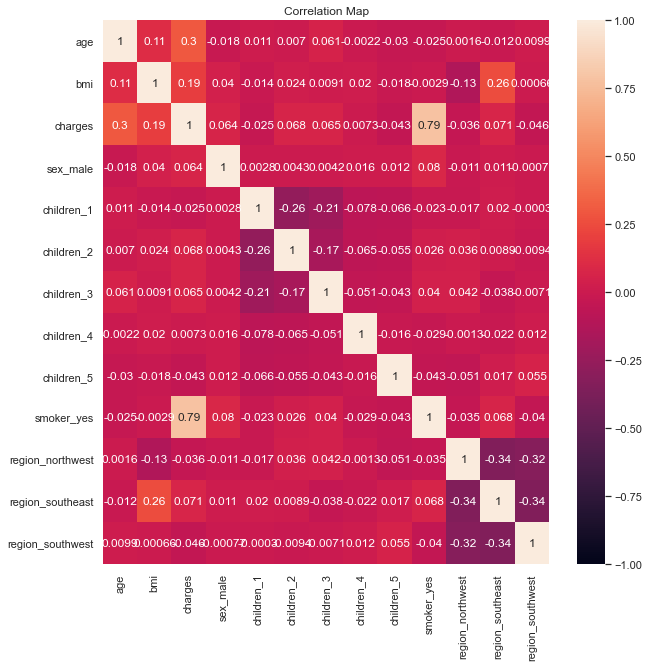

In [54]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True,vmin=-1, vmax=1)
plt.title('Correlation Map')
plt.show()

In [55]:
df.head()

,age,bmi,charges,sex_male,children_1,children_2,children_3,children_4,children_5,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,16884.92400,0,0,0,0,0,0,1,0,0,1
1,18,33.770,1725.55230,1,1,0,0,0,0,0,0,1,0
2,28,33.000,4449.46200,1,0,0,1,0,0,0,0,1,0
3,33,22.705,21984.47061,1,0,0,0,0,0,0,1,0,0
4,32,28.880,3866.85520,1,0,0,0,0,0,0,1,0,0


In [346]:
df.to_csv('C:\Lachin\DataSets\Insurance\Insurance_Dummy.csv', index=False)

In [56]:
x = df.drop('charges', axis=1)
y = df['charges']

In [57]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.8,random_state=0)

### Machine Learning

#### Linear Regression

In [59]:
model = LinearRegression()

In [60]:
model.fit(x_train,y_train)

LinearRegression()

In [61]:
model.intercept_

-12300.435287757527

In [62]:
model.coef_

array([  284.27072503,   283.51193574,  1548.42675892,  1221.7441018 ,
        2205.56211465,  3340.41264149,  3583.76790804,  1597.7960248 ,
       23901.82147796,  -805.69782578, -1501.72201232, -1905.38536195])

In [63]:
model.score(x_train,y_train)

0.7749790918142917

In [64]:
model.score(x_test,y_test)#Model is not overfitted

0.7316472493674571

In [67]:
y_pred = model.predict(x_test)
mse = mean_squared_error(y_pred,y_test)

In [68]:
print(mse)

38823335.29898613


In [80]:
residuals = y_test - y_pred
print(residuals)

1295     1477.752702
448       353.982351
461     -9545.124110
252      5357.534376
1259     1144.323116
            ...     
589      -946.024560
148     -2834.116469
161     10485.531440
755     -3072.363975
866     -2293.857493
Name: charges, Length: 1063, dtype: float64


C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='charges', ylabel='Density'>

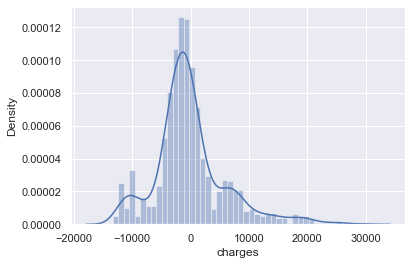

In [81]:
sns.distplot(residuals, kde=True)#Residuals are normally distributed

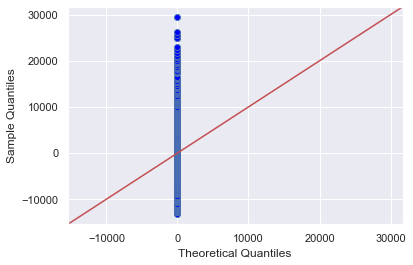

In [82]:
sms.qqplot(residuals, line="45")#residuals are not normally distributed
py.show()

<AxesSubplot:ylabel='charges'>

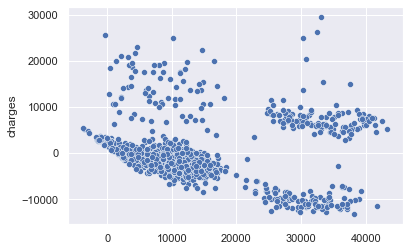

In [74]:
sns.scatterplot(x=y_pred, y=residuals)#with predictions, residuals are decreased, some pattern here
#hetroscedasticity is presented

In [85]:
x.head()

,age,bmi,sex_male,children_1,children_2,children_3,children_4,children_5,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,0,0,0,0,0,1,0,0,1
1,18,33.770,1,1,0,0,0,0,0,0,1,0
2,28,33.000,1,0,0,1,0,0,0,0,1,0
3,33,22.705,1,0,0,0,0,0,0,1,0,0
4,32,28.880,1,0,0,0,0,0,0,1,0,0


In [92]:
variable=[]
VIF = []
for i,j in enumerate(x_train.columns):
    variable.append(j)
    vif = variance_inflation_factor(x_train.values,i)
    VIF.append(vif)
vif_dic = {'Variables':variable,'VIF':VIF}
    

In [94]:
vif_df = pd.DataFrame(vif_dic)

In [95]:
vif_df.head()

,Variables,VIF
0,age,7.874649
1,bmi,11.998474
2,sex_male,2.069883
3,children_1,1.587548
4,children_2,1.549233


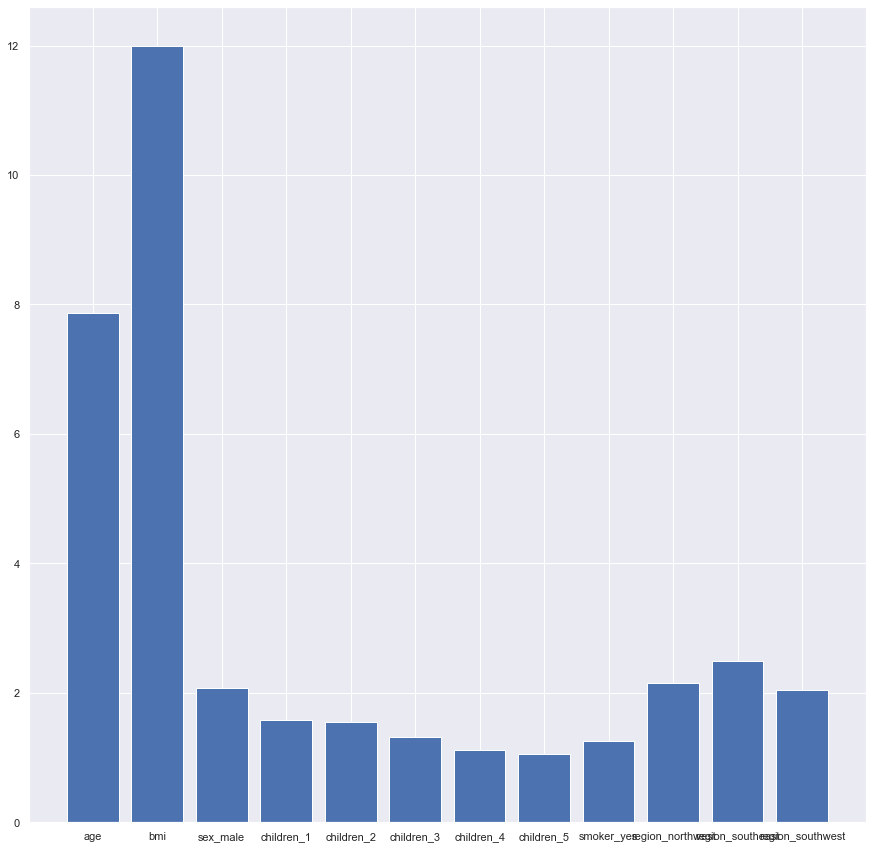

In [107]:
plt.figure(figsize=(15,15))
plt.bar(x=vif_df['Variables'], height=vif_df['VIF'])#Only bmi is having highcorrelation
plt.show()
#Regularization techniques are much better

In [134]:
models=[]
mse=[]
def regression_normal(algo,x_train,x_test,y_train,y_test):
    model = algo
    models.append(algo)
    model.fit(x_train,y_train)
    print('Training Model Score'.center(40,'='))
    print(model.score(x_train,y_train))
    print('Testing Model Score'.center(40,'='))
    print(model.score(x_test,y_test))
    
    #Predictions
    global y_pred
    y_pred = model.predict(x_test)
    print('Mean Sqaured Error'.center(40,'='))
    print(mean_squared_error(y_test,y_pred))
    mse.append(mean_squared_error(y_pred,y_test))
    
    #Residual plot
    print('Residual Plot'.center(40,'='))
    residuals = y_test-y_pred
    sns.distplot(residuals,kde=True)
    plt.show()

In [135]:
model_std = []
mse_std = []
def regression_preprocessed(algo,x_train,x_test,y_train,y_test):
    stc = StandardScaler()
    x_train_std = stc.fit_transform(x_train)
    x_test_std = stc.fit_transform(x_test)
    model = algo
    model_std.append(f'{algo}')
    model.fit(x_train_std,y_train)
    print('Training Model Score'.center(40,'='))
    print(model.score(x_train_std,y_train))
    print('Testing Model Score'.center(40,'='))
    print(model.score(x_test_std,y_test))
    
    #Predictions
    global y_pred
    y_pred = model.predict(x_test_std)
    print('Mean Sqaured Error'.center(40,'='))
    print(mean_squared_error(y_test,y_pred))
    mse_std.append(mean_squared_error(y_pred,y_test))
    
    #Residual plot
    print('Residual Plot'.center(40,'='))
    residuals = y_test-y_pred
    sns.distplot(residuals,kde=True)
    plt.show()


==========Training Model Score==========
0.7749790918142917
==========Testing Model Score===========
0.7316472493674571
===========Mean Sqaured Error===========
38823335.29898613
=============Residual Plot==============


C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


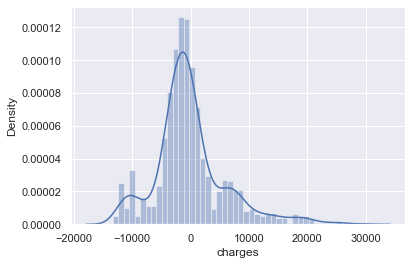

In [136]:
regression_normal(LinearRegression(),x_train,x_test,y_train,y_test)

==========Training Model Score==========
0.7749790918142917
==========Testing Model Score===========
0.7294443359582661
===========Mean Sqaured Error===========
39142036.88008811
=============Residual Plot==============


C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


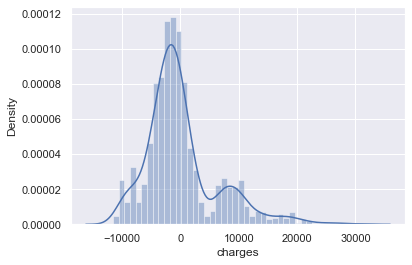

In [137]:
regression_preprocessed(LinearRegression(),x_train,x_test,y_train,y_test)#Mean Squared error is slightly increased

   ### Lasso(L1 Regularization)

==========Training Model Score==========
0.774977390645508
==========Testing Model Score===========
0.7318004737376234
===========Mean Sqaured Error===========
38801167.90519226
=============Residual Plot==============


C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


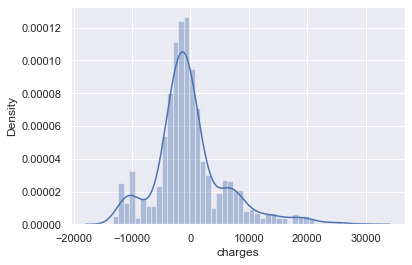

In [139]:
regression_normal(Lasso(alpha=1),x_train,x_test,y_train,y_test)

==========Training Model Score==========
0.7749789128496284
==========Testing Model Score===========
0.7294982188827768
===========Mean Sqaured Error===========
39134241.48823823
=============Residual Plot==============


C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


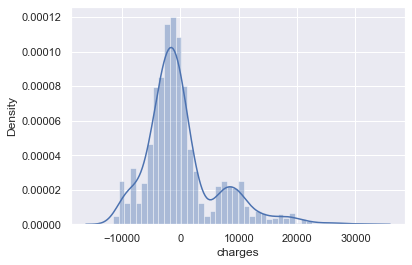

In [140]:
regression_preprocessed(Lasso(alpha=1),x_train,x_test,y_train,y_test)#MSE has increased

In [166]:
#Hyper Parameter optimization
params={'alpha':range(1,100)}
model = Lasso()
gscv = GridSearchCV(model,params,cv=5,n_jobs=-1)
gscv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': range(1, 100)})

In [167]:
gscv.best_params_

{'alpha': 76}

In [168]:
gscv.best_estimator_

Lasso(alpha=76)

==========Training Model Score==========
0.769068177165257
==========Testing Model Score===========
0.7368506336075036
===========Mean Sqaured Error===========
38070547.29675914
=============Residual Plot==============


C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


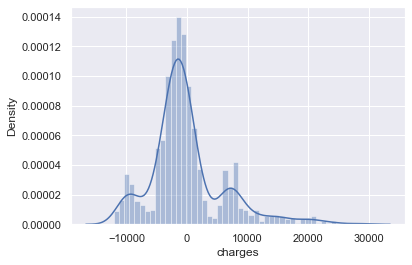

In [169]:
regression_normal(Lasso(alpha=76),x_train,x_test,y_train,y_test)#Trained for best models

### Ridge Regression(L2 Normalization)

In [183]:
params = {'alpha':[i/10 for i in range(1,10)]}
model = Ridge()
gscv1 = GridSearchCV(model, params,cv=5, n_jobs=-1)
gscv1.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                   0.9]})

In [184]:
gscv1.best_params_

{'alpha': 0.9}

==========Training Model Score==========
0.7745660996721715
==========Testing Model Score===========
0.7327627563526958
===========Mean Sqaured Error===========
38661951.815439925
=============Residual Plot==============


C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


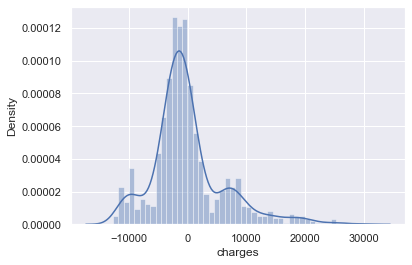

In [187]:
regression_normal(Ridge(alpha=0.9),x_train,x_test,y_train,y_test)

### Elastic Net

In [194]:
params={'alpha':[i/10 for i in range(0,11)]}
model = ElasticNet()
gscv = GridSearchCV(model,params,cv=5,n_jobs=-1)
gscv.fit(x_train,y_train)

C:\Users\acer\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:880: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self.best_estimator_.fit(X, y, **fit_params)
C:\Users\acer\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\acer\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4187516220.816424, tolerance: 3721890.783020427
  model = cd_fast.enet_coordinate_descent(


GridSearchCV(cv=5, estimator=ElasticNet(), n_jobs=-1,
             param_grid={'alpha': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                   0.9, 1.0]})

In [195]:
gscv.best_params_

{'alpha': 0.0}

<ipython-input-134-400be653a99a>:6: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  model.fit(x_train,y_train)
C:\Users\acer\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\acer\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4187516220.816424, tolerance: 3721890.783020427
  model = cd_fast.enet_coordinate_descent(
C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (a

==========Training Model Score==========
0.7749790918142917
==========Testing Model Score===========
0.7316472493674573
===========Mean Sqaured Error===========
38823335.29898609
=============Residual Plot==============


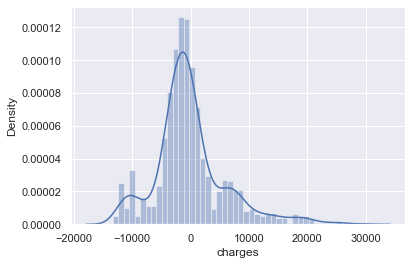

In [196]:
regression_normal(ElasticNet(alpha=0),x_train,x_test,y_train,y_test)

### KNN

In [200]:
K = range(1,40)
mse_knn =[]
for i in K:
    model = KNeighborsRegressor(n_neighbors=i)
    model.fit(x_train,y_train)
    mse_knn.append(mean_squared_error(model.predict(x_test),y_test))

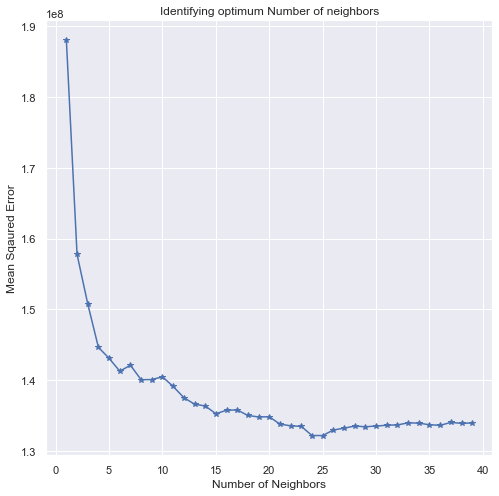

In [202]:
plt.figure(figsize=(8,8))
plt.plot(K,mse_knn,'b*-')
plt.xlabel('Number of Neighbors')
plt.ylabel('Mean Sqaured Error')
plt.title('Identifying optimum Number of neighbors')
plt.show()#optimim number of neighbors are 8

==========Training Model Score==========
0.28345448962061626
==========Testing Model Score===========
0.03178384166546788
===========Mean Sqaured Error===========
140074511.88152403
=============Residual Plot==============


C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


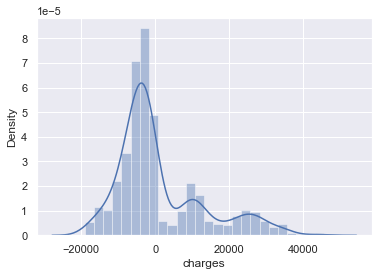

In [203]:
regression_normal(KNeighborsRegressor(n_neighbors=8),x_train,x_test,y_train,y_test)#Without preprocessing very poor results are given

==========Training Model Score==========
0.6885946674030314
==========Testing Model Score===========
0.5791161126065728
===========Mean Sqaured Error===========
60890437.09706693
=============Residual Plot==============


C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


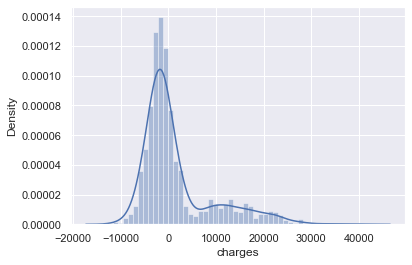

In [204]:
regression_preprocessed(KNeighborsRegressor(n_neighbors=8),x_train,x_test,y_train,y_test)
#Even after preprocessing results are not much of good

### Decision Tree Regressor

==========Training Model Score==========
1.0
==========Testing Model Score===========
0.7127551701419758
===========Mean Sqaured Error===========
41556504.69835701
=============Residual Plot==============


C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


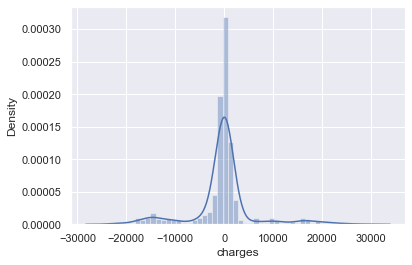

In [207]:
regression_normal(DecisionTreeRegressor(),x_train,x_test,y_train,y_test)#Model is overfitted,Tuning essential

In [213]:
params={'min_samples_leaf':range(1,100),'min_samples_split':range(1,100)}
model = DecisionTreeRegressor(max_depth=3, criterion='mae',splitter='best')
gscv2 = GridSearchCV(model,params,cv=5,n_jobs=-1)
gscv2.fit(x_train,y_train)

C:\Users\acer\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [        nan  0.83295328  0.83295328 ... -0.00710513 -0.00710513
 -0.00710513]
  warnings.warn(


GridSearchCV(cv=5,
             estimator=DecisionTreeRegressor(criterion='mae', max_depth=3),
             n_jobs=-1,
             param_grid={'min_samples_leaf': range(1, 100),
                         'min_samples_split': range(1, 100)})

In [214]:
gscv2.best_params_

{'min_samples_leaf': 7, 'min_samples_split': 2}

==========Training Model Score==========
0.8561062463090012
==========Testing Model Score===========
0.8185672113227558
===========Mean Sqaured Error===========
26248383.787546482
=============Residual Plot==============


C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


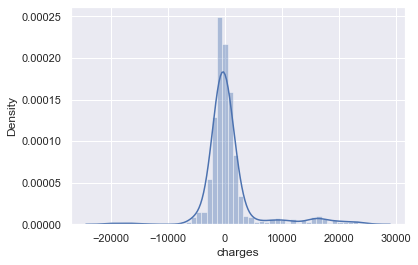

In [215]:
regression_normal(
    DecisionTreeRegressor(max_depth=3, criterion='mae',splitter='best',min_samples_leaf=7,min_samples_split=2),
    x_train,
    x_test,
    y_train,
    y_test)#Model is more generalised
#No overfitting
#mean squared error is significantly reduced

#Since bagging classifier is highly correlated with splitting random forrest is execised
### RandomForrest Regressor


==========Training Model Score==========
0.9769075793519469
==========Testing Model Score===========
0.8205410231327381
===========Mean Sqaured Error===========
25962826.96901039
=============Residual Plot==============


C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


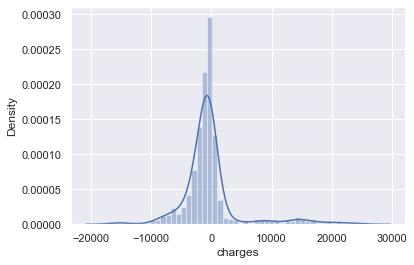

In [216]:
regression_normal(RandomForestRegressor(),x_train,x_test,y_train,y_test)#Model is overfitted tunning can be done

In [225]:
params={'min_samples_split':range(1,100),'min_samples_leaf':range(1,100)}
model = RandomForestRegressor(n_estimators=7,max_depth=3)
gscv3 = GridSearchCV(model,params,cv=5,n_jobs=-1)
gscv3.fit(x_train,y_train)

C:\Users\acer\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [        nan  0.83426356  0.84519183 ... -0.00949569 -0.01110712
 -0.01067302]
  warnings.warn(


GridSearchCV(cv=5, estimator=RandomForestRegressor(max_depth=3, n_estimators=7),
             n_jobs=-1,
             param_grid={'min_samples_leaf': range(1, 100),
                         'min_samples_split': range(1, 100)})

In [226]:
gscv3.best_params_

{'min_samples_leaf': 4, 'min_samples_split': 8}

==========Training Model Score==========
0.8704394611022942
==========Testing Model Score===========
0.832636644245428
===========Mean Sqaured Error===========
24212919.979048233
=============Residual Plot==============


C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


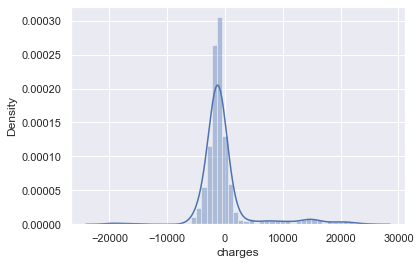

In [227]:
regression_normal(
    RandomForestRegressor(n_estimators=7,max_depth=3,min_samples_leaf=4, min_samples_split=8),
    x_train,
    x_test,
    y_train,
    y_test)#Model is more generalised now

### Extra Trees Regressor

==========Training Model Score==========
1.0
==========Testing Model Score===========
0.8093017383948391
===========Mean Sqaured Error===========
27588845.40508642
=============Residual Plot==============


C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


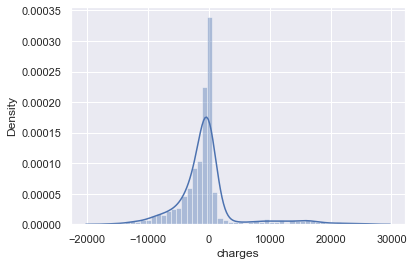

In [228]:
regression_normal(ExtraTreesRegressor(),x_train,x_test,y_train,y_test)#Overfitted

In [235]:
params={'min_samples_split':range(1,100),'min_samples_leaf':range(1,100)}
model = ExtraTreesRegressor(n_estimators=81,max_depth=5,)
gscv4 = GridSearchCV(model,params,cv=5,n_jobs=-1)
gscv4.fit(x_train,y_train)

C:\Users\acer\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [            nan  8.41271838e-01  8.39102234e-01 ...  1.05587530e-04
 -4.44458374e-03 -5.35946164e-03]
  warnings.warn(


GridSearchCV(cv=5, estimator=ExtraTreesRegressor(max_depth=5, n_estimators=81),
             n_jobs=-1,
             param_grid={'min_samples_leaf': range(1, 100),
                         'min_samples_split': range(1, 100)})

In [236]:
gscv4.best_params_

{'min_samples_leaf': 1, 'min_samples_split': 4}

==========Training Model Score==========
0.8998349381734009
==========Testing Model Score===========
0.8362873845462865
===========Mean Sqaured Error===========
23684757.27359557
=============Residual Plot==============


C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


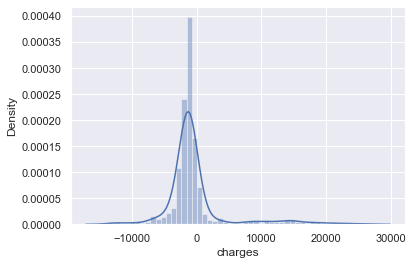

In [237]:
regression_normal(ExtraTreesRegressor(n_estimators=81,max_depth=5,min_samples_leaf=1,min_samples_split=4),
                  x_train,
                  x_test,
                  y_train,
                  y_test)

### Adaboost Regressor

==========Training Model Score==========
0.8402077223717284
==========Testing Model Score===========
0.7973996149046947
===========Mean Sqaured Error===========
29310758.558346946
=============Residual Plot==============


C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


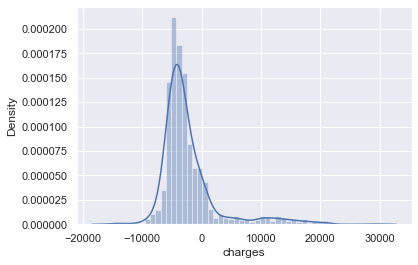

In [238]:
regression_normal(AdaBoostRegressor(),x_train,x_test,y_train,y_test)

In [244]:
params={'learning_rate':[float(i)/10 for i in range(1,11)]}
model = AdaBoostRegressor(n_estimators=3,loss='exponential',)
gscv5 = GridSearchCV(model,params,cv=5,n_jobs=-1)
gscv5.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=AdaBoostRegressor(loss='exponential', n_estimators=3),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,
                                           0.8, 0.9, 1.0]})

In [245]:
gscv5.best_params_

{'learning_rate': 0.6}

==========Training Model Score==========
0.8628022613804438
==========Testing Model Score===========
0.8295004391242214
===========Mean Sqaured Error===========
24666643.455703497
=============Residual Plot==============


C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


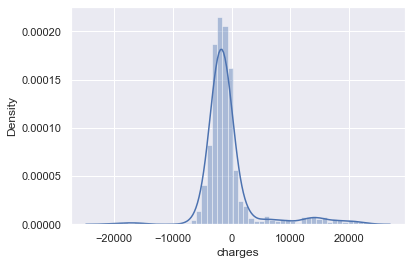

In [246]:
regression_normal(AdaBoostRegressor(n_estimators=3,loss='exponential',learning_rate=0.6),
                  x_train,
                  x_test,
                  y_train,
                  y_test)

### GradientBoos Regressor

==========Training Model Score==========
0.9544711211633439
==========Testing Model Score===========
0.8252022440356115
===========Mean Sqaured Error===========
25288475.237610795
=============Residual Plot==============


C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


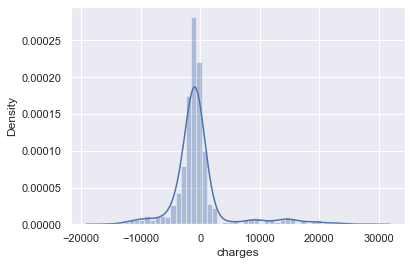

In [248]:
regression_normal(GradientBoostingRegressor(),x_train,x_test,y_train,y_test)#Overfitted

In [261]:
params={'learning_rate':[float(i)/10 for i in range(1,11)]}
model = GradientBoostingRegressor(loss='huber',n_estimators=41,criterion='mse', min_samples_leaf=1,min_samples_split=16)
gscv6 = GridSearchCV(model,params,cv=5,n_jobs=-1)
gscv6.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=GradientBoostingRegressor(criterion='mse', loss='huber',
                                                 min_samples_split=16,
                                                 n_estimators=41),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,
                                           0.8, 0.9, 1.0]})

In [262]:
gscv6.best_params_

{'learning_rate': 0.1}

==========Training Model Score==========
0.8853551357362843
==========Testing Model Score===========
0.841938259129556
===========Mean Sqaured Error===========
22867229.604653582
=============Residual Plot==============


C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


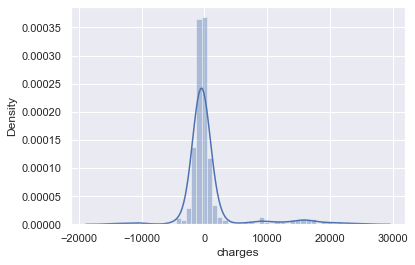

In [263]:
regression_normal(GradientBoostingRegressor(loss='huber',n_estimators=41,criterion='mse', min_samples_leaf=1,min_samples_split=16),
                  x_train,
                  x_test,
                  y_train,
                  y_test)

### XGB Regrssor

==========Training Model Score==========
0.999983616809815
==========Testing Model Score===========
0.8038595460198006
===========Mean Sqaured Error===========
28376182.441281058
=============Residual Plot==============


C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


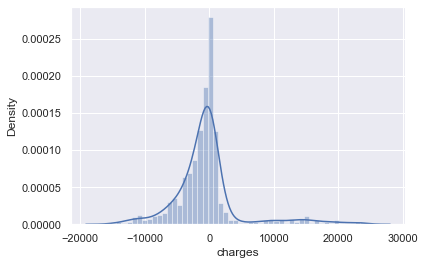

In [264]:
regression_normal(XGBRegressor(),x_train,x_test,y_train,y_test)#Overfitted

In [270]:
params={'learning_rate':[float(i)/10 for i in range(1,11)]}
model = XGBRegressor(n_estimators=9, max_depth=2)
gscv7 = GridSearchCV(model,params,cv=5,n_jobs=-1)
gscv7.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=2, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=9, n_jobs=None,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_parameter

In [271]:
gscv7.best_params_

{'learning_rate': 0.4}

==========Training Model Score==========
0.882255978226818
==========Testing Model Score===========
0.8457388221135378
===========Mean Sqaured Error===========
22317391.636888225
=============Residual Plot==============


C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


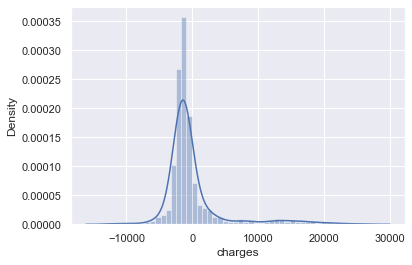

In [272]:
regression_normal(XGBRegressor(n_estimators=9, max_depth=2,learning_rate=0.4),
                  x_train,
                  x_test,
                  y_train,
                  y_test)

### Stacking Regressor

In [274]:
T1 = ('xgb',XGBRegressor(n_estimators=9, max_depth=2,learning_rate=0.4))
T2 = ('gbr',GradientBoostingRegressor(loss='huber',n_estimators=41,criterion='mse', min_samples_leaf=1,min_samples_split=16))
metamodel = ExtraTreesRegressor(n_estimators=81,max_depth=5,min_samples_leaf=1,min_samples_split=4)

==========Training Model Score==========
0.8910052401113782
==========Testing Model Score===========
0.846630598460305
===========Mean Sqaured Error===========
22188375.884149943
=============Residual Plot==============


C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


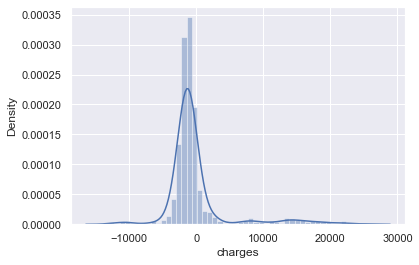

In [275]:
regression_normal(StackingRegressor(estimators=[T1,T2],final_estimator=metamodel),x_train,x_test,y_train,y_test)

### Voting Regressor

==========Training Model Score==========
0.8902182961864934
==========Testing Model Score===========
0.848664263656336
===========Mean Sqaured Error===========
21894159.910565607
=============Residual Plot==============


C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


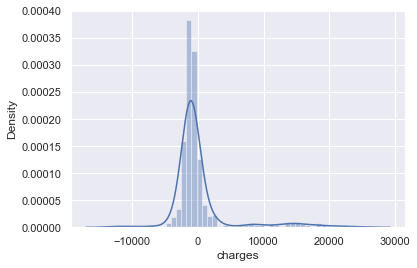

In [276]:
T11 = ('xgb',XGBRegressor(n_estimators=9, max_depth=2,learning_rate=0.4))
T22 = ('gbr',GradientBoostingRegressor(loss='huber',n_estimators=41,criterion='mse', min_samples_leaf=1,min_samples_split=16))
T33 = ('str',StackingRegressor(estimators=[T1,T2],final_estimator=metamodel))
regression_normal(VotingRegressor(estimators=[T11,T22,T33]),x_train,x_test,y_train,y_test)
       

In [297]:
models

[LinearRegression(),
 Lasso(alpha=1),
 Lasso(alpha=76),
 Ridge(alpha=0.9),
 Ridge(alpha=0.99),
 Ridge(alpha=0.9),
 ElasticNet(alpha=0),
 KNeighborsRegressor(n_neighbors=8),
 DecisionTreeRegressor(),
 DecisionTreeRegressor(criterion='mae', max_depth=3, min_samples_leaf=7),
 RandomForestRegressor(),
 RandomForestRegressor(max_depth=3, min_samples_leaf=4, min_samples_split=8,
                       n_estimators=7),
 ExtraTreesRegressor(),
 ExtraTreesRegressor(max_depth=5, min_samples_split=4, n_estimators=81),
 AdaBoostRegressor(),
 AdaBoostRegressor(learning_rate=0.6, loss='exponential', n_estimators=3),
 AdaBoostRegressor(),
 GradientBoostingRegressor(),
 GradientBoostingRegressor(criterion='mse', loss='huber', min_samples_split=16,
                           n_estimators=41),
 XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
    

In [298]:
mse

[38823335.29898613,
 38801167.90519226,
 38070547.29675914,
 38661951.815439925,
 38653810.142548494,
 38661951.815439925,
 38823335.29898609,
 140074511.88152403,
 41556504.69835701,
 26248383.787546482,
 25962826.96901039,
 24212919.979048233,
 27588845.40508642,
 23684757.27359557,
 29310758.558346946,
 24666643.455703497,
 29416331.895424582,
 25288475.237610795,
 22867229.604653582,
 28376182.441281058,
 22317391.636888225,
 22188375.884149943,
 21894159.910565607]

In [309]:
allmodels={'Models':models,'MSE':mse}

In [310]:
data2 = pd.DataFrame(allmodels)

In [313]:
data2.tail(10)

,Models,MSE
13,"(ExtraTreeRegressor(max_depth=5, min_samples_s...",2.368476e+07
14,"(DecisionTreeRegressor(max_depth=3, random_sta...",2.931076e+07
15,"(DecisionTreeRegressor(max_depth=3, random_sta...",2.466664e+07
16,"(DecisionTreeRegressor(max_depth=3, random_sta...",2.941633e+07
17,([DecisionTreeRegressor(criterion='friedman_ms...,2.528848e+07
18,"([DecisionTreeRegressor(max_depth=3, min_sampl...",2.286723e+07
19,"XGBRegressor(base_score=0.5, booster='gbtree',...",2.837618e+07
20,"XGBRegressor(base_score=0.5, booster='gbtree',...",2.231739e+07
21,"StackingRegressor(estimators=[('xgb',\n ...",2.218838e+07
22,"VotingRegressor(estimators=[('xgb',\n ...",2.189416e+07


In [314]:
SqrtMSE = [np.sqrt(i) for i in data2['MSE'].values]

In [315]:
data2['SqrtMSE'] = SqrtMSE

In [317]:
data2.tail()

,Models,MSE,SqrtMSE
18,"([DecisionTreeRegressor(max_depth=3, min_sampl...",2.286723e+07,4781.969218
19,"XGBRegressor(base_score=0.5, booster='gbtree',...",2.837618e+07,5326.929926
20,"XGBRegressor(base_score=0.5, booster='gbtree',...",2.231739e+07,4724.128664
21,"StackingRegressor(estimators=[('xgb',\n ...",2.218838e+07,4710.453894
22,"VotingRegressor(estimators=[('xgb',\n ...",2.189416e+07,4679.119566


In [318]:
np.min(data2['SqrtMSE'].values)

4679.119565747985

In [320]:
index=data2.index
index1 = index[data2['SqrtMSE'].values==4679.119565747985]

In [323]:
print(data2['Models'][index1])

22    VotingRegressor(estimators=[('xgb',\n         ...
Name: Models, dtype: object


## Best Model

In [333]:
T11 = ('xgb',XGBRegressor(n_estimators=9, max_depth=2,learning_rate=0.4))
T22 = ('gbr',GradientBoostingRegressor(loss='huber',n_estimators=41,criterion='mse', min_samples_leaf=1,min_samples_split=16))
T33 = ('str',StackingRegressor(estimators=[T1,T2],final_estimator=metamodel))
final_model = VotingRegressor(estimators=[T11,T22,T33])

In [334]:
final_model.fit(x_train,y_train)

VotingRegressor(estimators=[('xgb',
                             XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=0.4,
                                          max_delta_step=None, max_depth=2,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=9, n_jobs...
                                                                         num_parallel_tree=None,
                                                                         random_sta

In [335]:
train_modelscore = final_model.score(x_train,y_train)
test_modelscore = final_model.score(x_test,y_test)

In [336]:
print(train_modelscore,test_modelscore)

0.890230251931447 0.8489862623809404


In [337]:
y_pred_final = final_model.predict(x_test)

In [338]:
sqrtmse_final = np.sqrt(mean_squared_error(y_pred_final,y_test))

In [339]:
sqrtmse_final

4674.139007743258

### Saving Final Model

In [342]:
pickle.dump(final_model,open('Insurance_cost_prediction.pkl','wb'))

In [345]:
file ='C:\Lachin\Data Science\Trained Models\Insurance Predictions\Insurance_final_model.pkl'
pickle.dump(final_model,open(file,'wb'))